# 项目：沃尔玛销售数据

## 简介

变量含义：
- `Store`：店铺编号
- `Date`：销售周
- `Weekly_Sales`：店铺在该周的销售额
- `Holiday_Flag`：是否为假日周
- `Temperature`：销售日的温度
- `Fuel_Price`：该地区的燃油成本
- `CPI`（消费者物价指数）：消费者物价指数
- `Unemployment`：失业率

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./walmart_stores_data.csv")
original_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## **评估和清理数据**

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；
数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度（结构）

In [4]:
cleaned_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度（内容）

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


从输出结果来看，`cleaned_data`数据共有6435条观察值，变量均不存在缺失值。

数据类型方面，我们已知`Date`（日期）需要转换为日期类型；  

In [6]:
cleaned_data["Date"] = pd.to_datetime(cleaned_data["Date"], format='%d-%m-%Y')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


处理缺失数据 —— 没有缺失数据

处理重复数据 —— 根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

处理不一致数据 —— 不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。这里不存在

#### 处理无效或者错误数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [8]:
cleaned_data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


从以上统计信息来看，`cleaned_data`里不存在脱离现实意义的数值。

## **数据可视化与探索**

In [9]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [10]:
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


### 销售额趋势图

查看每周销售额随时间的变化趋势。
绘制`Date`与`Weekly_Sales`之间的折线图，看看是否存在明显的季节性或周期性。

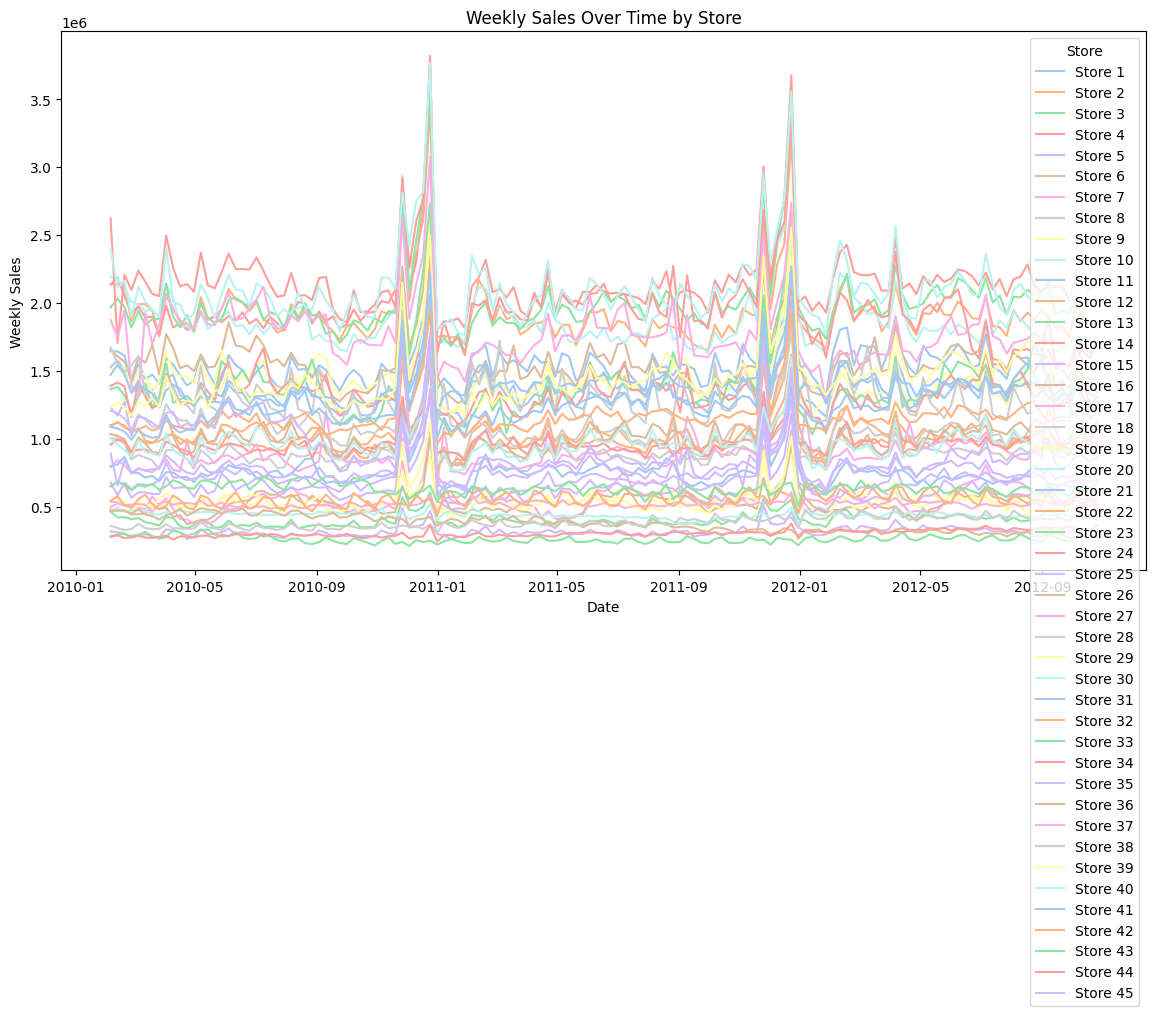

In [11]:
# 分组绘制
plt.figure(figsize=(14, 7))

# 对每个门店进行分组并绘制折线图
for store, data in cleaned_data.groupby('Store'):
    plt.plot(data['Date'], data['Weekly_Sales'], label=f'Store {store}')

plt.title('Weekly Sales Over Time by Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.show()


### 节假周对比

分析节假周与非节假周的销售额差异。
使用`boxplot`或`barplot`查看`Holiday_Flag`对`Weekly_Sales`的影响。

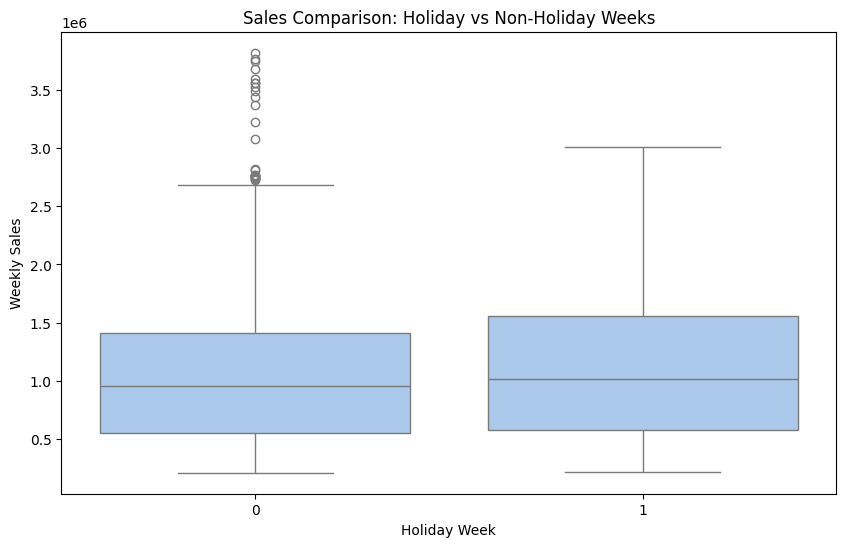

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=cleaned_data)
plt.title('Sales Comparison: Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Week')
plt.ylabel('Weekly Sales')
plt.show()

### 相关性热图：

分析各特征（温度、燃油价格、CPI、失业率）与销售额之间的相关性。
使用`seaborn`的`heatmap`绘制相关性矩阵。

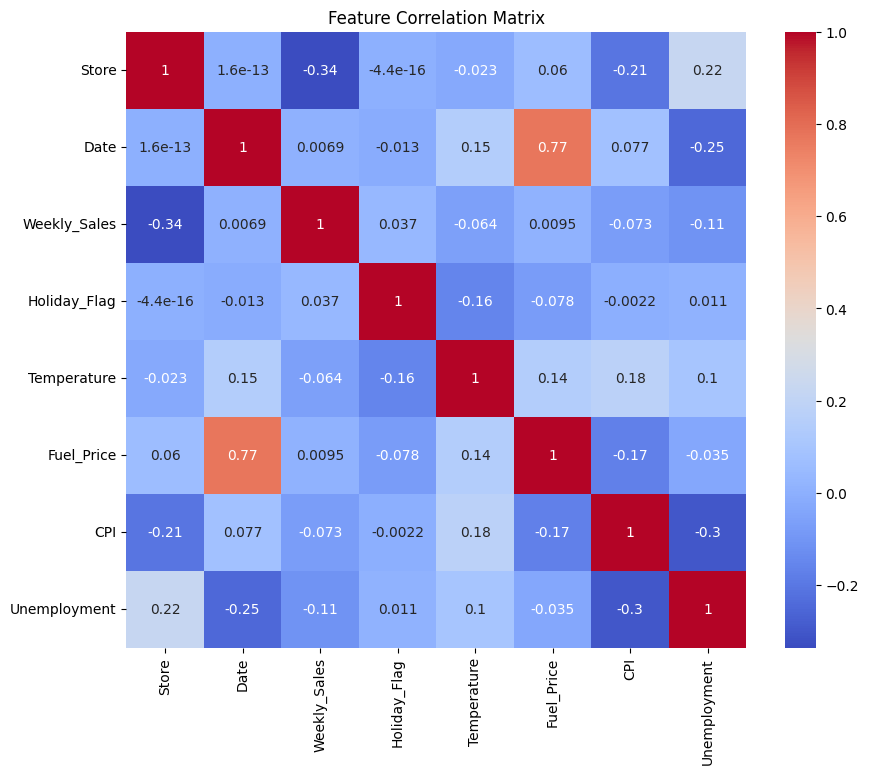

In [14]:
corr_matrix = cleaned_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### 门店销售对比

分析不同门店（`Store`）的销售额（`Weekly_Sales`）差异。

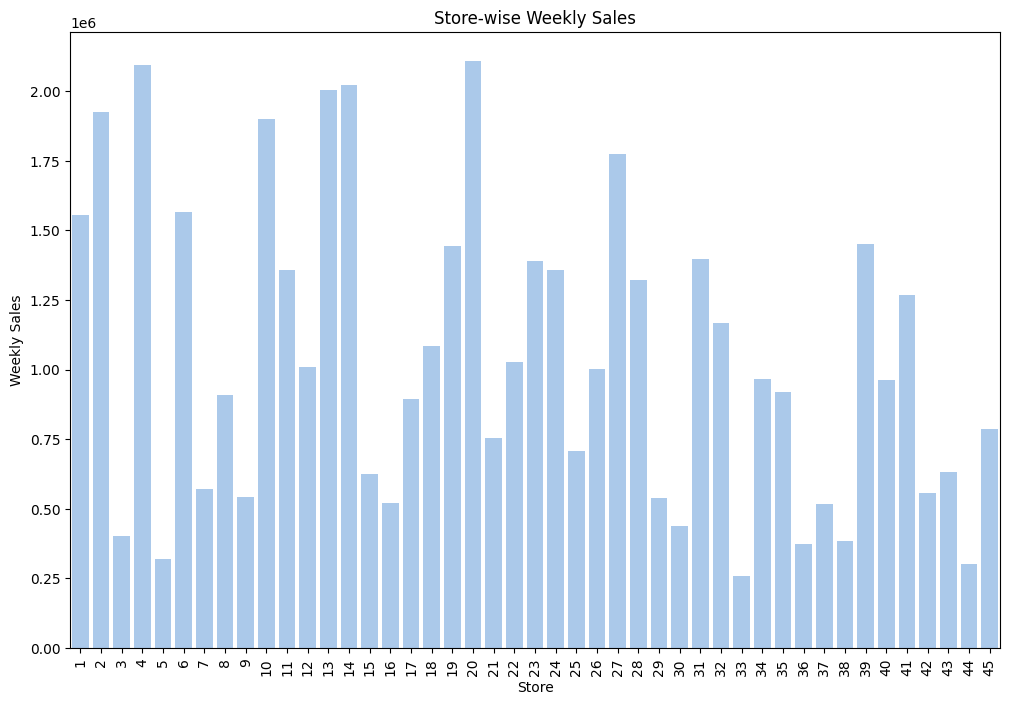

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=cleaned_data, errorbar=None)
plt.title('Store-wise Weekly Sales')
plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

## 4 特征工程与建模

### 特征工程

日期特征提取：从日期中提取出有用的时间特征，如年、月、星期几、是否为周末等。

In [16]:
cleaned_data['Year'] = cleaned_data['Date'].dt.year
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.dayofweek
cleaned_data['IsWeekend'] = cleaned_data['DayOfWeek'].isin([5, 6]).astype(int)

In [17]:
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,DayOfWeek,IsWeekend
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4,0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4,0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4,0


滚动平均：创建滚动平均特征，平滑时间序列，捕捉长期趋势。

In [18]:
cleaned_data['Weekly_Sales_MA'] = cleaned_data['Weekly_Sales'].rolling(window=4).mean()

In [19]:
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,DayOfWeek,IsWeekend,Weekly_Sales_MA
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4,0,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4,0,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,0,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,0,1.576836e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4,0,1.554615e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4,0,7.262528e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4,0,7.179884e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4,0,7.260449e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4,0,7.248047e+05


滞后特征：使用滞后特征（如前几周的销售额）来帮助模型理解时间序列的依赖性。

In [20]:
cleaned_data['Lag_1'] = cleaned_data['Weekly_Sales'].shift(1)
cleaned_data['Lag_2'] = cleaned_data['Weekly_Sales'].shift(2)

In [21]:
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,DayOfWeek,IsWeekend,Weekly_Sales_MA,Lag_1,Lag_2
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4,0,NaN,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4,0,NaN,1643690.90,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,0,NaN,1641957.44,1643690.90
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,0,1.576836e+06,1611968.17,1641957.44
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4,0,1.554615e+06,1409727.59,1611968.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4,0,7.262528e+05,723086.20,702238.27
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4,0,7.179884e+05,713173.95,723086.20
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4,0,7.260449e+05,733455.07,713173.95
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4,0,7.248047e+05,734464.36,733455.07


节假日影响：创建一个变量，衡量节假日对前后几周销售的影响。

In [22]:
cleaned_data['Holiday_Lag'] = cleaned_data['Holiday_Flag'].shift(1)
cleaned_data['Holiday_Lead'] = cleaned_data['Holiday_Flag'].shift(-1)

In [23]:
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,DayOfWeek,IsWeekend,Weekly_Sales_MA,Lag_1,Lag_2,Holiday_Lag,Holiday_Lead
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4,0,NaN,NaN,NaN,NaN,1.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4,0,NaN,1643690.90,NaN,0.0,0.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,0,NaN,1641957.44,1643690.90,1.0,0.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,0,1.576836e+06,1611968.17,1641957.44,0.0,0.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4,0,1.554615e+06,1409727.59,1611968.17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4,0,7.262528e+05,723086.20,702238.27,0.0,0.0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4,0,7.179884e+05,713173.95,723086.20,0.0,0.0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4,0,7.260449e+05,733455.07,713173.95,0.0,0.0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4,0,7.248047e+05,734464.36,733455.07,0.0,0.0


### 建模

选择模型
1. 时间序列模型：如ARIMA、SARIMA模型，适用于时间序列数据。
2. 回归模型：如线性回归、随机森林、XGBoost等，适用于包括滞后特征的回归问题。

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 选择特征和目标变量
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 
            'Unemployment', 'Year', 'Month', 'DayOfWeek', 'Lag_1', 'Lag_2']
target = 'Weekly_Sales'

# 去掉NaN值（由滞后特征引入）
model_data = cleaned_data.dropna()

X = model_data[features]
y = model_data[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测和评估模型
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 72427.64387319346
